# Seminář obecné psychologie - Rozpoznávání ne/pravého úsměvu

## Úvod

Francouzský lékař [Guillaume Duchenne](https://cs.wikipedia.org/wiki/Guillaume_Duchenne_de_Boulogne) (1806– 1875) a jeho dobrovolník při stimulaci obličejových svalů elektrickým proudem za účelem identifikace svalů, které jsou zapojené v různých obličejových výrazech.

<img src="www/duchenne.png" width = "75%">

Guillaume Duchenne zjistil, že pravý úsměv zahrnuje nejen zygomaticus major (zvedající koutky úst), ale také orbicularis oculi (vytvářející „vějířky“ okolo očí), který není na rozdíl od z.m. pod volní kontrolou.

<img src="www/oblicejove_svaly.png" width = "75%">

Psycholog [Paul Ekman](https://cs.wikipedia.org/wiki/Paul_Ekman), známý výzkumník v oblasti vyjadřování emocí prostřednictvím mimických výrazů ve tváři, demonstruje dva druhy úsměvů - duchennovský (pravý) úsměv (vlevo) a neduchennovský (nepravý) úsměv (vpravo).   
<img src="www/ekman_duchenne.png" width = "75%">

Klíčový je rozdíl ve výrazu v oblasti očí - viz detail níže. 

<img src="www/oci.png" width = "75%">

A nyní v celku i se zbytkem obličeje.  

<img src="www/oblicej.png" width = "75%">

## Výzkumná úloha ze semináře

### Hlavní výzkumná otázka
* Dokážou lidé rozpoznat pravý úsměv od nepravého?

### Měřená proměnná
* Počet úspěšných identifikací ne/pravého úsměvu v rámci 20 pokusů.

### Statistická hypotéza
* Lidé dokážou správně rozpoznat ne/pravý úsměv častěji než by odpovídalo prostému hádání (tzn., že budou úspěšní ve více jak 10 pokusech z 20).

### Vedlejší výzkumné otázky zkoumané v rámci explorativní analýzy
* Jaký je vztah mezi schopností rozpoznávat ne/pravý úsměv a emoční inteligencí, sociální inteligencí, obecnou inteligencí, "big-five" osobnostními charakteristikami a pohlavím (viz data z předchozího výzkumu).

### Podnětový materiál
<img src="www/podnety.png">
(https://www.surveymonkey.com/r/SmileRead)

### Data

In [100]:
library(tidyverse)
mydata <- read_delim("./Data_FakeSmiles.csv", delim = ";")
glimpse(mydata)
mydata$Pohlavi <- as.factor(ifelse(mydata$Pohlavi == 1, "M","F"))

Parsed with column specification:
cols(
  Vek = col_integer(),
  Pohlavi = col_integer(),
  Emocni_inteligence = col_integer(),
  Social_information_processing = col_integer(),
  Social_skills = col_integer(),
  Social_awareness = col_integer(),
  Obecna_inteligence = col_integer(),
  Extraverze = col_double(),
  Privetivost = col_double(),
  Svedomitost = col_double(),
  Emocni_Stabilita = col_double(),
  Otevrenost = col_double(),
  Fake_smiles_score = col_integer()
)


Observations: 65
Variables: 13
$ Vek                           <int> 20, 20, 21, 21, 23, 21, 19, 20, 19, 2...
$ Pohlavi                       <int> 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1...
$ Emocni_inteligence            <int> 127, NA, 161, 101, NA, 133, 144, 121,...
$ Social_information_processing <int> 33, NA, 48, 29, NA, 45, 42, 38, 44, 3...
$ Social_skills                 <int> 33, NA, 47, 21, NA, 45, 36, 37, 26, 3...
$ Social_awareness              <int> 36, NA, 36, 22, NA, 43, 44, 46, 38, 4...
$ Obecna_inteligence            <int> 11, NA, 10, 12, NA, 12, 11, 13, 13, 1...
$ Extraverze                    <dbl> 4.0, 5.5, 6.0, NA, NA, 6.0, 4.5, NA, ...
$ Privetivost                   <dbl> 5.5, 4.5, 5.5, NA, NA, 5.0, 4.5, NA, ...
$ Svedomitost                   <dbl> 6.5, 3.5, 6.5, NA, NA, 7.0, 5.5, NA, ...
$ Emocni_Stabilita              <dbl> 6.0, 4.0, 6.0, NA, NA, 5.5, 1.5, NA, ...
$ Otevrenost                    <dbl> 4.5, 6.5, 6.5, NA, NA, 4.5, 5.5, NA, ...
$ Fake_smiles_score  

### Popis výzkumného souboru

In [101]:
# Z hlediska věku probandů
library(Hmisc)
mydata %>%
select(Vek) %>%
Hmisc::describe()

. 

 1  Variables      65  Observations
--------------------------------------------------------------------------------
Vek 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
      65        0       10    0.937    21.08    2.403     19.0     19.0 
     .25      .50      .75      .90      .95 
    20.0     20.0     21.0     22.6     24.8 
                                                                      
Value         19    20    21    22    23    24    25    26    29    43
Frequency     14    23    12     9     1     2     1     1     1     1
Proportion 0.215 0.354 0.185 0.138 0.015 0.031 0.015 0.015 0.015 0.015
--------------------------------------------------------------------------------

In [102]:
# Z hlediska pohlaví probandů
table(mydata$Pohlavi)
round(prop.table(table(mydata$Pohlavi)),2)


 F  M 
55 10 


   F    M 
0.85 0.15 

### Popisná statistika sledované proměnné

In [103]:
# Popisná statistika ke všem sledovaným proměnným 
library(psych)
mydata %>%
select(-Vek, -Pohlavi) %>%
psych::describe()

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
Emocni_inteligence,1,55,127.327273,11.8197176,126.0,127.244444,10.37820,99.0,161.0,62.0,0.182416137,0.2972917,1.5937704
Social_information_processing,2,55,39.400000,4.4663350,39.0,39.555556,4.44780,29.0,49.0,20.0,-0.337159605,0.0317880,0.6022405
Social_skills,3,55,33.072727,8.4368121,33.0,33.222222,10.37820,16.0,47.0,31.0,-0.218916976,-1.0874199,1.1376195
Social_awareness,4,53,38.660377,6.0158234,40.0,39.325581,5.93040,22.0,48.0,26.0,-0.904818431,0.3305199,0.8263369
Obecna_inteligence,5,49,11.510204,1.5427579,12.0,11.487805,1.48260,9.0,15.0,6.0,0.131320092,-0.7771163,0.2203940
Extraverze,6,42,4.142857,1.3264923,4.0,4.147059,1.48260,1.0,6.5,5.5,-0.064171692,-0.7603101,0.2046822
Privetivost,7,42,5.297619,0.7813335,5.0,5.264706,0.74130,3.5,7.0,3.5,0.145744518,-0.8068192,0.1205624
Svedomitost,8,42,5.369048,1.2200536,5.5,5.470588,1.48260,1.5,7.0,5.5,-0.951216912,0.8887741,0.1882584
Emocni_Stabilita,9,42,4.047619,1.4725518,4.0,4.058824,1.85325,1.5,6.5,5.0,-0.001530203,-1.2830026,0.2272197
Otevrenost,10,42,5.190476,1.1736559,5.5,5.294118,0.74130,2.5,7.0,4.5,-0.682064270,-0.3374073,0.1810990


Warning message:
"Removed 13 rows containing non-finite values (stat_boxplot)."Warning message:
"Removed 13 rows containing non-finite values (stat_summary)."Warning message:
"Removed 13 rows containing missing values (geom_point)."Warning message:
"Removed 13 rows containing non-finite values (stat_bin)."

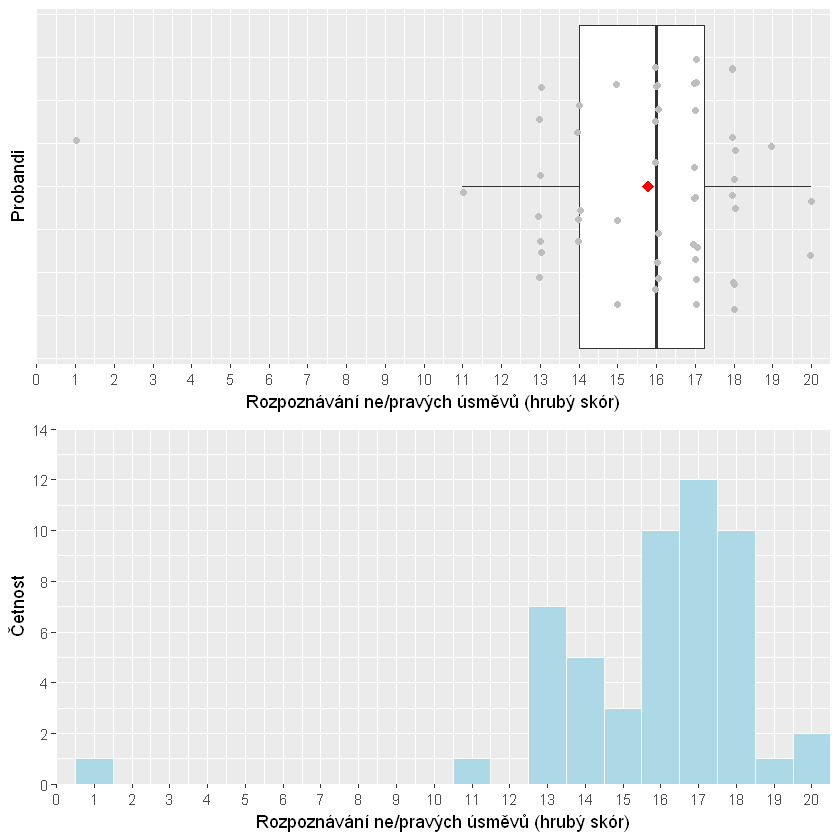

In [104]:
# Vizualizace distribuce skórů z úloh na rozpoznávání ne/pravých úsměvů
library(gridExtra)
graf1 <- ggplot(mydata, aes(Fake_smiles_score))+
      geom_histogram(colour="white", fill="lightblue", binwidth = 1)+
      scale_x_continuous(expand = c(0,0), limit = c(0, 20.5), breaks = seq(0,20,1))+
      scale_y_continuous(expand = c(0,0), limit = c(0, 14), breaks = seq(0,14,2))+
      xlab("Rozpoznávání ne/pravých úsměvů (hrubý skór)")+
      ylab("Četnost")
                        
graf2 <- ggplot(mydata, aes(x = 1, y = Fake_smiles_score))+
      geom_boxplot(outlier.shape = NA)+
      geom_jitter(color = "grey", width = 0.3, height = 0.05)+
      stat_summary(fun.y=mean, colour="red", geom="point", shape=18, size=3)+
      coord_flip()+
      scale_y_continuous(expand = c(0,0), limit = c(0, 20.5), breaks = seq(0,20,1))+
      theme(axis.text.y=element_blank(),
        axis.ticks.y=element_blank())+
      xlab("Probandi")+
      ylab("Rozpoznávání ne/pravých úsměvů (hrubý skór)")
    
grid.arrange(graf2, graf1, ncol=1)

### Testování statistické hypotézy

  Data
mydata$Fake_smiles_score, n = 52

  Model parameters and generated quantities
mu: the mean of mydata$Fake_smiles_score 
sigma: the scale of mydata$Fake_smiles_score , a consistent
  estimate of SD when nu is large.
nu: the degrees-of-freedom for the t distribution fitted to mydata$Fake_smiles_score 
eff_size: the effect size calculated as (mu - 10) / sigma
x_pred: predicted distribution for a new datapoint generated as mydata$Fake_smiles_score 

  Measures
           mean    sd  HDIlo  HDIup %<comp %>comp
mu       16.188 0.331 15.533 16.834  0.000  1.000
sigma     1.927 0.312  1.334  2.563  1.000  0.000
nu        5.747 4.971  1.213 12.449  0.910  0.090
eff_size  3.305 0.624  2.185  4.562  1.000  0.000
x_pred   16.194 3.083 10.901 21.509  0.016  0.984

'HDIlo' and 'HDIup' are the limits of a 95% HDI credible interval.
'%<comp' and '%>comp' are the probabilities of the respective parameter being
smaller or larger than 10.

  Quantiles
          q2.5%   q25% median   q75% q97.5%
mu

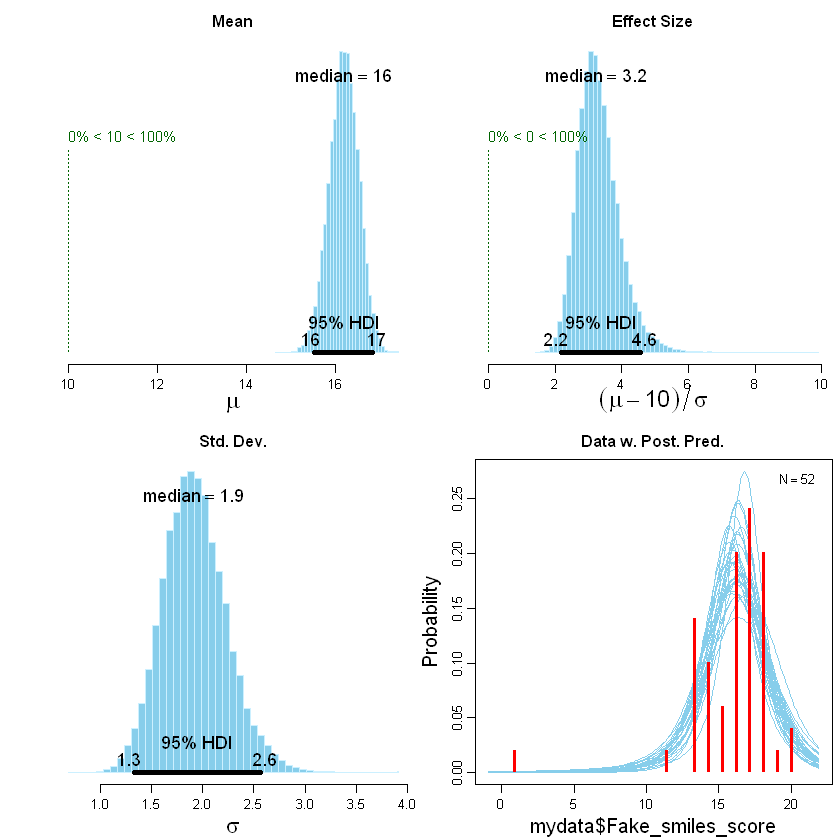

In [105]:
# Bayesovský jednovýběrový t-test 
library(BayesianFirstAid)
fit <- bayes.t.test(mydata$Fake_smiles_score, conf.int=0.99, mu=10)
plot(fit)
summary(fit)

In [106]:
# Klasický jednováběrový t-test
t.test(mydata$Fake_smiles_score, conf.int=0.99, mu=10, alternative = "greater")


	One Sample t-test

data:  mydata$Fake_smiles_score
t = 14.431, df = 51, p-value < 2.2e-16
alternative hypothesis: true mean is greater than 10
95 percent confidence interval:
 15.11649      Inf
sample estimates:
mean of x 
 15.78846 


### Explorační analýza

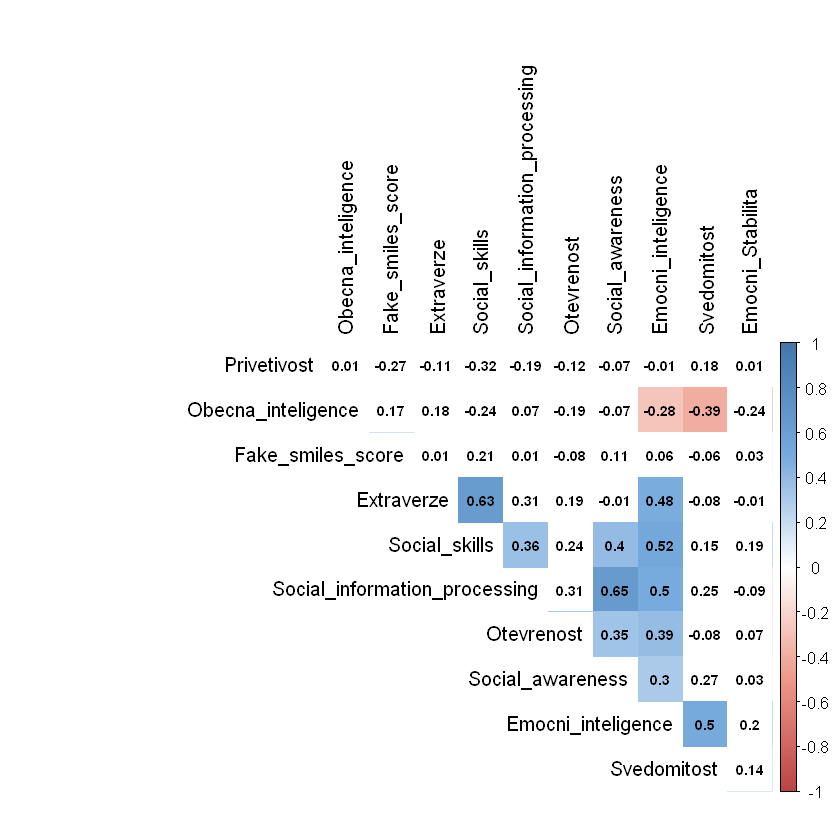

In [115]:
# Korelační matice
library(corrplot)
col <- colorRampPalette(c("#BB4444", "#EE9988", "#FFFFFF", "#77AADD", "#4477AA"))

M <- mydata %>%
select(-Vek, -Pohlavi) %>%
cor(use="pairwise.complete.obs", method="pearson")

res <- mydata %>%
select(-Vek, -Pohlavi) %>%
cor.mtest(conf.level = .95)

corrplot(M, method = "color", col = col(200),
         type = "upper", order = "AOE", number.cex = .7, # AOE, hclust, FPC
         addCoef.col = "black", # Add coefficient of correlation
         tl.col = "black", tl.srt = 90, # Text label color and rotation
         # Combine with significance
         p.mat = res$p, sig.level = 0.05, insig = "blank", 
         # hide correlation coefficient on the principal diagonal
         diag = FALSE)

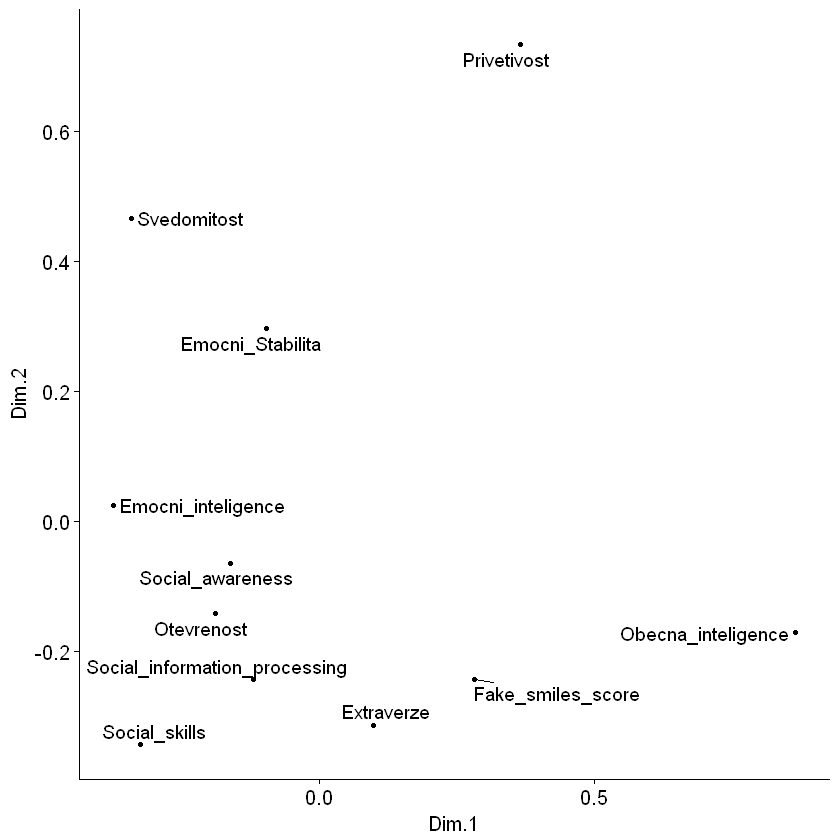

In [112]:
# Vizualizace korelační matice pomocí metody multidimenzionálního škálování
library(ggpubr)
mds.cor <- (1 - M) %>%
cmdscale() %>%
as_tibble()

colnames(mds.cor) <- c("Dim.1", "Dim.2")
ggscatter(mds.cor, x = "Dim.1", y = "Dim.2", 
          size = 1,
          label = colnames(M),
          repel = TRUE)

## Detekce lži

* Američtí studenti lžou v průměru 2krát denně (DePaulo et al., 1996). 
* Lidé se při detekci lži často spoléhají na neverbální chování - při lhaní se vyskytuje méně ilustrátorů a více manipulátorů a emblémů (Ekman, 2001).
* Spolehlivějším vodítkem jsou verbální vodítka (Vrij, 2008) – např. při lhaní tvrzení obsahují méně detailů a méně kvalifikátorů (“Nejsem si jistý, ale myslím si, že…”) (DePaulo, Lindsay,Malone, et al., 2003).
* Lidé, včetně profesionálů, nejsou příliš úspěšní v detekci lži - většinou okolo 55 % a jen pár přesáhne 70 % - viz tabulka níže (Ekman, 2001; Ekman & O’Sullivan, 1991; Ekman, O’Sullivan, & Frank, 1999; Zuckerman, DePaulo, & Rosenthal, 1981; Kraut & Poe, 1980; DePaulo & Pfeifer, 1986).

<img src="www/lzi.png">
(Ekman, O‘Sullivan, & Frank, 1999)
* Vliv praxe vs. sebevýběr (?).
* Existuje pouze malá až nulová korelace mezi vírou ve vlastní schopnost detekovat lež a skutečnou schopností lež detekovat (Ekman, 2001).

## Detekce lži a mikrovýrazy

Schopnost zachytit a rozlišit mikrovýrazy může být užitečná při detekci lži.

[<img src="www/ekman.png" width = "60%">](https://www.youtube.com/watch?v=qGQf9O61cww)

Zachycení a rozlišení emočních mikrovýrazů lze do určité míry automatizovat.

[<img src="www/facereader.png" width = "60%">](https://www.youtube.com/watch?v=cvjHHD_qgEU&list=PLX4xBCPBmZGiQ7XZt-zuk9LZ9DlIvkim9&index=1)

Zachycení a rozlišení emočních mikrovýrazů lze do určité míry natrénovat.

[<img src="www/mett.png">](https://www.paulekman.com/product/ekman-mett-lite/)

[<img src="www/trainer.png" width = "60%">](https://www.youtube.com/watch?v=QFK327d01Kg)

[<img src="www/trainer2.png" width = "60%">](http://emotionen-lesen-lernen.de/index.php)

## Osobnost vepsaná  ve tváři

[<img src="www/pivonkova.png">](http://www.ceskatelevize.cz/porady/10121359557-port/687-na-prvni-pohled/video/)

### Příklad výzkumné úlohy
* **Podnětový materiál:** 20 dvojic fotografií mužských a ženských tváří vytvořených superponováním většího počtu fotografií tváří osob s vysokými, resp. nízkými skóry v dotazníku měřícím 5 základních osobnostních rysů (fotografie pocházejí z výzkumu [Littlea a Perretta (2007)](https://onlinelibrary.wiley.com/doi/full/10.1348/000712606X109648)).
* **Zadání/otázka:** Kdo z dané dvojice má danou osobnostní vlastnost ve větší míře?
* **On-line formulář:** https://goo.gl/wRZ5OS

<img src="www/faces.png" width = "50%">

  Data
number of successes = 13, number of trials = 20

  Model parameters and generated quantities
theta: the relative frequency of success
x_pred: predicted number of successes in a replication

  Measures
         mean    sd HDIlo  HDIup %<comp %>comp
theta   0.638 0.099 0.373  0.863  0.091  0.909
x_pred 12.753 2.896 5.000 19.000  0.000  1.000

'HDIlo' and 'HDIup' are the limits of a 99% HDI credible interval.
'%<comp' and '%>comp' are the probabilities of the respective parameter being
smaller or larger than 0.5.

  Quantiles
       q2.5%   q25% median   q75% q97.5%
theta  0.435  0.572  0.642  0.708  0.818
x_pred 7.000 11.000 13.000 15.000 18.000


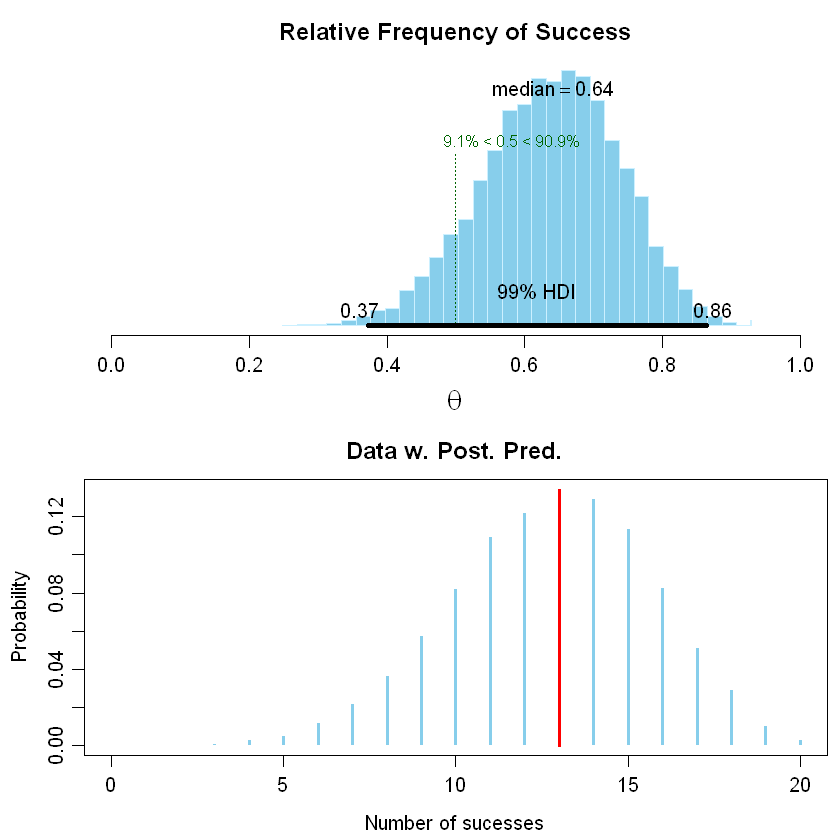

In [69]:
# Bayesovský binomický test
fit2 <- bayes.binom.test(13, 20, conf.level = 0.99, p = 0.5)
plot(fit2)
summary(fit2)

In [70]:
# Klasický binomický test
binom.test(13, 20, conf.level = 0.99, p = 0.5)


	Exact binomial test

data:  13 and 20
number of successes = 13, number of trials = 20, p-value = 0.2632
alternative hypothesis: true probability of success is not equal to 0.5
99 percent confidence interval:
 0.3434314 0.8861202
sample estimates:
probability of success 
                  0.65 
